In [1]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()

### Functions & variables from former tasks

#### Functions

In [2]:
def skew(v):
    return Matrix([[0, -v[2], v[1]],
                   [v[2], 0, -v[0]],
                   [-v[1], v[0], 0]])

def exp6(twist, theta):
    omega = skew(twist[:3])
    v = Matrix(twist[3:])
    T = eye(4)
    T[:3, :3] = exp3(twist[:3], theta)
    T[:3, 3] = (eye(3) * theta + (1 - cos(theta)) * omega +
                (theta - sin(theta)) * omega * omega) * v
    return T

def exp3(omega, theta):
    omega = skew(omega)
    R = eye(3) + sin(theta) * omega + (1 - cos(theta)) * omega * omega
    return R

def Ad(T):
    AdT = zeros(6)
    R = Matrix(T[:3, :3])
    AdT[:3, :3] = R
    AdT[3:, 3:] = R
    AdT[3:, :3] = skew(T[:3, 3]) * R
    return AdT

def Ad(T):
    AdT = zeros(6)
    R = Matrix(T[:3, :3])
    AdT[:3, :3] = R
    AdT[3:, 3:] = R
    AdT[3:, :3] = skew(T[:3, 3]) * R
    return AdT

def rotX(alfa_im1):
    Rx = eye(4)
    Rx[1,1] =    cos(alfa_im1)
    Rx[1,2] =   -sin(alfa_im1)
    Rx[2,1] =    sin(alfa_im1)
    Rx[2,2] =    cos(alfa_im1)
    return Rx

def rotZ(alfa_im1):
    Rz = eye(4)
    Rz[0,0] =    cos(alfa_im1)
    Rz[0,1] =   -sin(alfa_im1)
    Rz[1,0] =    sin(alfa_im1)
    Rz[1,1] =    cos(alfa_im1)
    return Rz

def transX(a_im1):
    trA = eye(4)
    trA[0,3] =  a_im1
    return trA

def transZ(d_i):
    trA = eye(4)
    trA[2,3] =  d_i
    return trA

def Js_maker(Slist, theta_list):
    n_joints = Slist.shape[1]
    Js = zeros(6, n_joints)
    
    for i in range(n_joints-1, -1, -1):
        T = exp6(Slist[:,i-1], theta_list[i-1])
        
        for j in range( i-2, -1, -1):
            T = exp6(Slist[:,j], theta_list[j]) * T
          
        Js[:,i] = Ad(T) * Slist[:,i]
    Js.simplify()
    return Js


#### Variables

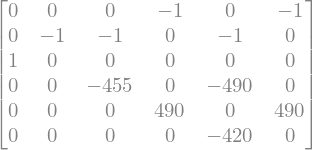

In [4]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')

config = Matrix([[0,0,0,th1],[pi/2,0,0,th2 + pi/2],[0,455,0,th3],[pi/2, 35, -420, th4],[-pi/2,0,0,th5],[pi/2, 0, -80,th6]])
config

Mi = Matrix([[eye(4)]*6])

for i in range(6):
    if i == 1:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2]) * rotZ(-pi/2) # We compansate for the rotation of -pi/2 done when finding the D-H parameters 
    else:
        Mi[:,4*i:4*(i+1)] = rotX(config[i,0]) * transX(config[i,1]) * transZ(config[i,2])


Ai = Matrix([[0,-1,0,0],[1,0,0,0],[0,0,0,0],[0,0,0,0]]) # This is a given matrix due to revolute joints

S_sp = zeros(6)
for i in range(6):
    dot_sum = eye(4)
    for n in range(i,-1,-1):
        dot_sum = Mi[:,4*n:4*(n+1)] * dot_sum
    S_skew = dot_sum * Ai * Inverse(dot_sum)
    S_sp[0,i] = S_skew[2,1] 
    S_sp[1,i] = S_skew[0,2] 
    S_sp[2,i] = S_skew[1,0] 
    S_sp[3,i] = S_skew[0,3] 
    S_sp[4,i] = S_skew[1,3] 
    S_sp[5,i] = S_skew[2,3] 
S_sp

## Le task

In [6]:
Js = Js_maker(S_sp, [th1,th2,th3,th4,th4,th5,th6])

In [7]:
det_Js = Js.det()

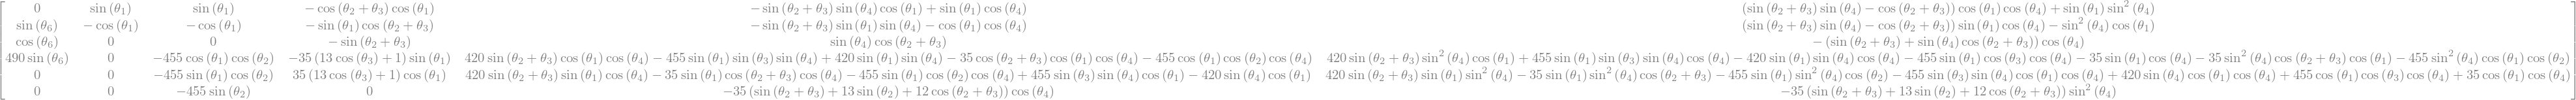

In [9]:
Js

In [8]:
solution = solve(det_Js,th1,th2,th3,th4,th4,th5,th6)

KeyboardInterrupt: 